In [1]:
# Examples
import pandas as pd
import numpy as np
from bokeh.charts import Bar,Histogram, output_notebook, show , BoxPlot
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# read flights delay data

df_flightsdelay = pd.read_csv('Data/FlightDelays.csv')
df_flightsdelay.head()


,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No


In [2]:
df_flightsdelay['Carrier'].value_counts()
# getting box plot

AA    2906
UA    1123
Name: Carrier, dtype: int64

In [3]:
output_notebook()
p = Bar(df_flightsdelay, 'Carrier', title="Bar Chart By Carrier", color = 'wheat', bar_width = 0.4)
show(p)

Loading BokehJS ...

In [4]:
#pd.pivot_table(df_flightsdelay,index= ['Carrier'], columns=['Delayed30'],values=['FlightLength'],
#               aggfunc = len,margins = True)

pd.pivot_table(df_flightsdelay,index= ['Carrier'], columns=['Delayed30'],values=[], aggfunc = len,
               margins = True,margins_name = 'Total')

Delayed30,No,Yes,Total
Carrier,,,
AA,2513.0,393.0,2906.0
UA,919.0,204.0,1123.0
Total,3432.0,597.0,4029.0


In [5]:
#df_flightsdelay.groupby(['Carrier','Delayed30']).count()
# Create a histogram for flights delay in tabular format

bins = np.arange(-50,500,50)
df_flightsdelay['Bin_Categories'] = pd.cut(df_flightsdelay['Delay'] , bins)

In [6]:
hist_series= df_flightsdelay[df_flightsdelay['Carrier'] == 'UA']['Bin_Categories'].value_counts()
print(hist_series)
df_flightsdelay.head()

(-50, 0]      722
(0, 50]       249
(50, 100]      86
(100, 150]     39
(150, 200]     14
(200, 250]      7
(250, 300]      3
(300, 350]      2
(350, 400]      1
(400, 450]      0
dtype: int64


,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30,Bin_Categories
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No,"(-50, 0]"
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes,"(100, 150]"
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No,"(0, 50]"
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No,"(-50, 0]"
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No,"(-50, 0]"


In [7]:
# getting UA
df_flightsdelay.head()
df_flightsdelay.drop(['Bin_Categories'], axis = 1,inplace= True,errors= 'ignore')
df_UA=df_flightsdelay[df_flightsdelay['Carrier']=='UA']

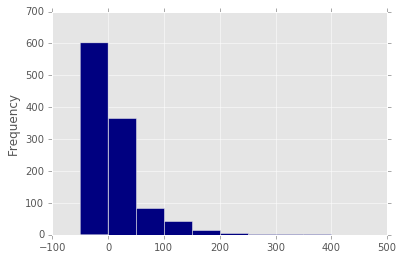

In [8]:
# plotting using matplotlib
df_UA['Delay'].plot.hist( bins = bins, color = 'navy')

In [9]:
p = Histogram(df_UA, values ='Delay', bins = 10)
show(p) ## Histogram error 

In [10]:
p = BoxPlot(df_UA , values= 'FlightLength' , label= 'Day' , 
            color= 'Day', outliers = True, marker = 'circle',plot_width=400)

show(p)

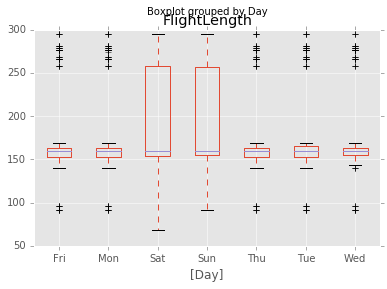

In [11]:
plt.figure();

df_UA.boxplot(column=['FlightLength'], by=['Day'])

In [12]:
df_UA['Delay'].describe()

count    1123.000000
mean       15.983081
std        45.138948
min       -17.000000
25%        -5.000000
50%        -1.000000
75%        12.500000
max       377.000000
Name: Delay, dtype: float64

In [13]:
df_UA['Delay'].std(ddof =0) # population standard deviation

45.118846509687714

In [14]:
# for quantiles function
from scipy.stats import norm
## inverse of cdf
norm.ppf(0.6, 3,5)
norm.ppf(0.25)


-0.67448975019608171

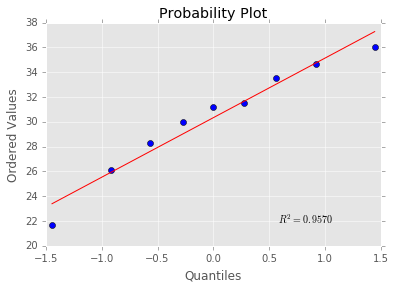

In [15]:
# example page 24
from scipy.stats import probplot
import pylab
x=pd.Series([21.7, 26.1, 28.3, 30, 31.2, 31.5, 33.5, 34.7, 36])
probplot(x ,dist= 'norm', plot= pylab)
pylab.show()

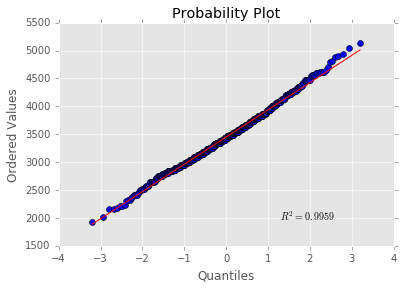

In [21]:
df_ncbirts = pd.read_csv('Data/NCBirths2004.csv')
probplot(df_ncbirts['Weight'] ,dist= 'norm', plot= pylab)
pylab.show()

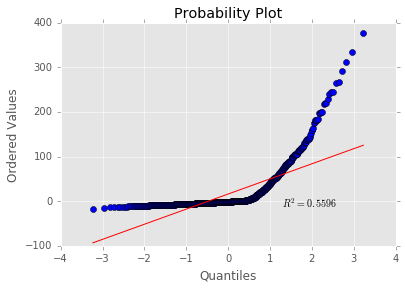

In [26]:
probplot( df_UA['Delay'], dist= 'norm', plot=pylab)
pylab.show()

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
ECDF(pd.Series([3,24,19,6,15,17,15]))
ecdf = ECDF([3, 3, 1, 4])
ecdf(pd.Series([3,24,19,6,15,17,15]))

array([ 0.75,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])